In [1]:
def read_file_text(filename, encoding='utf-8'):
    text = ''
    with open(filename, 'r', encoding=encoding) as f:
        try:
            text = f.read()
        except UnicodeDecodeError:
            logger.warning('Can\'t read file {0}. Bad encoding.'
                           .format(filename))
    return text

In [7]:
text = read_file_text('../../../datasets/bbc/cricket/008.txt')

In [8]:
text

'Bracewell worried by Lee\n\nNew Zealand coach John Bracewell is furious that Australia paceman Brett Lee has bowled four beamers at his batsmen in the current one-day series.\n\nBrendon McCullum was struck on the arm by a waist-high full toss in Auckland on Sunday, a match Australia won. Bracewell said: "He\'s been apologetic every time he\'s done it. "He was apologetic when he did it to Chris Harris, and Paul Wiseman, and he\'s apologised twice to Brendon. That\'s a lot of apologies."\n\nBracewell was also of the view that Lee had bowled a beamer at Pakistan\'s Abdul Razzaq during the VB Series. On Sunday, a furious McCullum confronted Lee mid-pitch after being struck on the arm, and while the incident was later resolved, Bracewell was not happy. Lee, who took 2-24 off seven overs on Saturday and also sent Michael Papps to hospital with a bouncer, was contrite afterwards.\n\nHe said the heavy dew caused his feet to shift on delivery stride and he lost control against McCullum. "Unfor

In [9]:
from itertools import combinations
from nltk.tokenize import sent_tokenize, RegexpTokenizer
from nltk.stem.snowball import RussianStemmer, EnglishStemmer
import networkx as nx
import matplotlib.pyplot as plt

### similarity
\begin{equation}
\frac{|sentence1 \cap sentence2|}{|sentence1 \cup sentence2|}
\end{equation}

There are many problems of this method:
- Ignoring key words (with more weight). But how to know these key words?
- Ignoring "junk" words (with less weight)
- If all sentences are not similare at all
- Words do not represent the point of text?

I started using good instruments

show the best of each method

Analyze result with evidences

Use method ROUGE for сравнение

In [10]:
def similarity(s1, s2):
    if not len(s1) or not len(s2):
        return 0.0
    return len(s1.intersection(s2)) / (1.0 * (len(s1) + len(s2)))

In [12]:
def textrank(text):
    """
    Returns
    list of sorted tuples by pagerank for sentences
    [(number_of_sentence, pagerank, sentence), ...]
    """
    sentences = sent_tokenize(text)
    for i, s in enumerate(sentences):
        lines = s.splitlines()
        [lines.pop(j) for j, l in enumerate(lines) if len(l) < 1]
        sentences.pop(i)
        sentences.extend(lines)

    tokenizer = RegexpTokenizer(r'\w+')
    # lmtzr = RussianStemmer()
    lmtzr = EnglishStemmer()
    # tokenize words and find unique stems for them
    stem_words_for_sentence = [set(lmtzr.stem(word)
                                   for word in tokenizer.tokenize(sentence.lower()))
                               for sentence in sentences]
    print(stem_words_for_sentence)
    
    pair_sentences = combinations(range(len(sentences)), 2)
    scores = [(i, j, similarity(stem_words_for_sentence[i], stem_words_for_sentence[j]))
              for i, j in pair_sentences]
    print(scores)
    # filter scores with existing similarity
    scores = filter(lambda x: x[2], scores)
    
    g = nx.Graph()
    # graph (u,v,w) - (sentence1 idx, sentence2 idx, similarity)
    g.add_weighted_edges_from(scores)
    pr = nx.pagerank(g)
    print()
    print(pr)
    
    my_sorted = sorted(((i, pr[i], s) for i, s in enumerate(sentences) if i in pr),
                       key=lambda x: pr[x[0]],
                       reverse=True)

    return my_sorted, g

def extract(text, n=5):
    tr = textrank(text)
    top_n = sorted(tr[:n])
    return ' '.join(x[2] for x in top_n)

In [13]:
s, g = textrank(text)

[{'full', 'arm', 'toss', 'by', 'a', 'in', 'high', 'won', 'match', 'struck', 'mccullum', 'on', 'waist', 'auckland', 'australia', 'the', 'was', 'sunday', 'brendon'}, {'it', 'when', 'chris', 'apologis', 'paul', 'twice', 'did', 's', 'he', 'apologet', 'brendon', 'and', 'harri', 'wiseman', 'was', 'to'}, {'also', 'pakistan', 'bowl', 'a', 'razzaq', 'had', 'view', 's', 'dure', 'beamer', 'lee', 'of', 'abdul', 'vb', 'the', 'that', 'bracewel', 'was', 'at', 'seri'}, {'also', 'contrit', 'took', 'bouncer', 'afterward', 'a', '24', 'with', 'lee', 'who', 'over', 'and', 'was', 'michael', 'seven', '2', 'off', 'hospit', 'saturday', 'on', 'papp', 'sent', 'to'}, {'didn', 'it', 'god', 'hit', 't', 'unfortun', 'came', 'ball', 'out', 'thank', 'lee', 'him', 'hurt', 'and', 'the', 'said'}, {'i', 'mean', 'it', 'second', 'up', 'apologis', '15', 'for', 'would', 'went', 'there', 'never', '20', 'mccullum', 'lost', 'do', 'and', 'that', 'said', 'to'}, {'pont', 'team', 'said', 'veri', 'have', 'on', 'got', 'well'}, {'been',

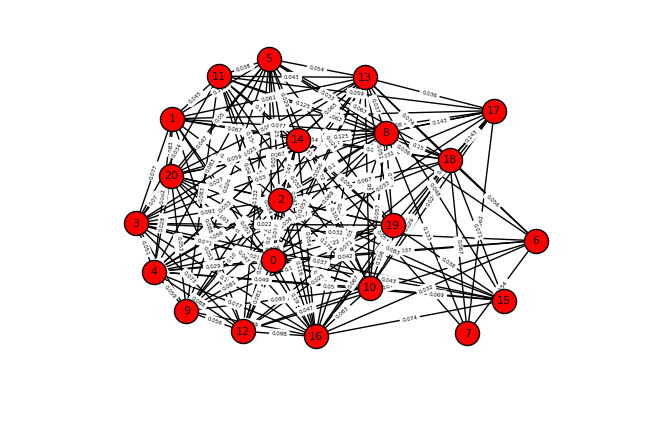

In [14]:
# pos=nx.get_node_attributes(g, 'pos')
pos=nx.spring_layout(g, scale=20)
nx.draw(g, pos)
w_labels = nx.get_edge_attributes(g, 'weight')
w_labels = dict((node, round(weight, 3)) for node, weight in w_labels.items())
# print(w_labels)
# get_node_attributes
nx.draw_networkx_labels(g, pos, font_size=8)
nx.draw_networkx_edge_labels(g, pos, edge_labels=w_labels, font_size=4)
plt.show()

In [15]:
s

[(2,
  0.07365010013851808,
  "Bracewell was also of the view that Lee had bowled a beamer at Pakistan's Abdul Razzaq during the VB Series."),
 (8,
  0.060732039218094426,
  'It\'s been a good series played in great spirit."'),
 (0,
  0.059365729499899815,
  'Brendon McCullum was struck on the arm by a waist-high full toss in Auckland on Sunday, a match Australia won.'),
 (14,
  0.05894419902660087,
  '"The only thing was the full-toss that Brett bowled, otherwise everything\'s been great.'),
 (16,
  0.058141589837091744,
  'On Sunday, a furious McCullum confronted Lee mid-pitch after being struck on the arm, and while the incident was later resolved, Bracewell was not happy.'),
 (18,
  0.05669031496777102,
  'Bracewell said: "He\'s been apologetic every time he\'s done it.'),
 (10,
  0.05354716785952021,
  'New Zealand coach John Bracewell is furious that Australia paceman Brett Lee has bowled four beamers at his batsmen in the current one-day series.'),
 (20,
  0.05082674423975817,
 